In [36]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import random
import matplotlib.pyplot as plt

In [37]:
import tensorflow.keras.backend as K
K.clear_session()

In [38]:
DATASET_PATH = 'test_set'

In [39]:
CATEGORIES = ['cats', 'dogs']

In [40]:
IMAGE_SIZE = 100

In [41]:
data = []
for category in CATEGORIES:
    path = os.path.join(DATASET_PATH, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
            data.append([img_array, class_num])
        except Exception as e:
            pass

In [42]:
np.random.shuffle(data)

In [43]:
X, y = [], []
for features, label in data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [45]:
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

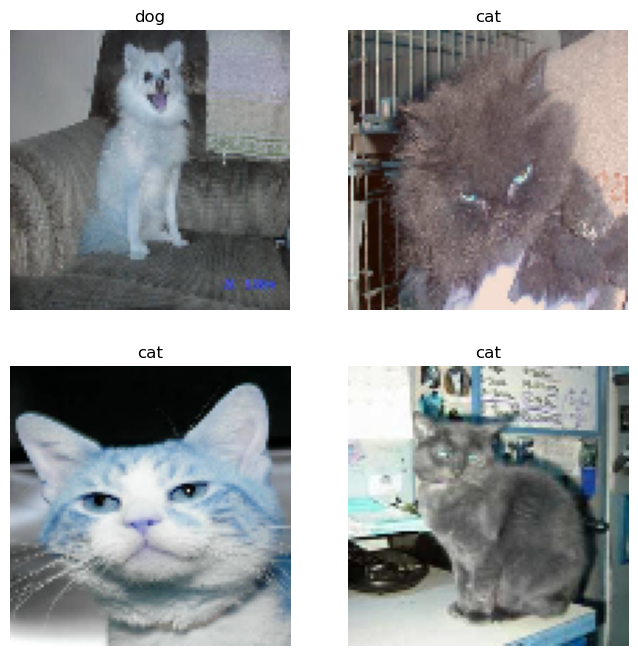

In [46]:
import matplotlib.pyplot as plt
class_labels = ['cat', 'dog']
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(2):
    for j in range(2):
        idx = np.random.randint(len(X_train))
        ax[i, j].imshow(X_train[idx])
        ax[i, j].set_title(class_labels[y_train[idx].argmax()])
        ax[i, j].axis('off')
plt.show()


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
51/51 [==============================] - 13s 237ms/step - loss: 0.7071 - accuracy: 0.5297 - val_loss: 0.6912 - val_accuracy: 0.5235
Epoch 2/20
51/51 [==============================] - 12s 233ms/step - loss: 0.6853 - accuracy: 0.5451 - val_loss: 0.6843 - val_accuracy: 0.5235
Epoch 3/20
51/51 [==============================] - 12s 227ms/step - loss: 0.6759 - accuracy: 0.5766 - val_loss: 0.6591 - val_accuracy: 0.6000
Epoch 4/20
51/51 [==============================] - 12s 239ms/step - loss: 0.6378 - accuracy: 0.6261 - val_loss: 0.6507 - val_accuracy: 0.6049
Epoch 5/20
51/51 [==============================] - 11s 225ms/step - loss: 0.5784 - accuracy: 0.6755 - val_loss: 0.6603 - val_accuracy: 0.6272
Epoch 6/20
51/51 [==============================] - 11s 224ms/step - loss: 0.5434 - accuracy: 0.7200 - val_loss: 0.6003 - val_accuracy: 0.6864
Epoch 7/20
51/51 [==============================] - 12s 226ms/step - loss: 0.4938 - accuracy: 0.7559 - val_loss: 0.5877 - val_accuracy: 0.7333

In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

13/13 [==============================] - 1s 52ms/step - loss: 1.5601 - accuracy: 0.7383
Test accuracy: 0.7382715940475464


In [53]:
predictions = model.predict(X_test)

13/13 [==============================] - 1s 53ms/step


In [54]:
for i in np.random.choice(X_test.shape[0], size=4, replace=False):
    img = X_test[i]
    true_label = CATEGORIES[np.argmax(y_test[i])]
    predicted_label = CATEGORIES[np.argmax(predictions[i])]
    print('True label:', true_label)
    print('Predicted label:', predicted_label)
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

True label: cats
Predicted label: cats
True label: dogs
Predicted label: cats
True label: cats
Predicted label: cats
True label: cats
Predicted label: cats


In [55]:
model.save('my_model.h5')


In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

13/13 [==============================] - 1s 59ms/step - loss: 1.5601 - accuracy: 0.7383
Test loss: 1.560
Test accuracy: 0.738


In [57]:
image_path = 'cat-2083492__340.jpg'
img_array = cv2.imread(image_path)
img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
img_array = np.array(img_array) / 255.0
prediction = model.predict(np.array([img_array]))
class_idx = np.argmax(prediction)
class_label = CATEGORIES[class_idx]
print(f'The predicted class is: {class_label}')

1/1 [==============================] - 0s 44ms/step
The predicted class is: dogs
